# 1 Import packages

In [2]:
#%pip install mplstereonet
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

# 2 Load data for original Figure 8, 9, 14, 15, 16, 17

In [3]:
# Pole trend = strike - 90°; pole plunge = 90° - dip
# Load data for original Figue 8 and 9
f_syn = open('./Figs8.9/correct_value.txt', 'r')
correct_syn = np.loadtxt(f_syn, skiprows=0, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_correct_syn, dip_correct_syn = 90 + correct_syn['trend'], 90 - correct_syn['plunge']

fL2_syn = open('./Figs8.9/randomized.poles.L2.txt', 'r')
L2_syn = np.loadtxt(fL2_syn, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_L2_syn, dip_L2_syn = 90 + L2_syn['trend'], 90 - L2_syn['plunge']

fTL_syn = open('./Figs8.9/randomized.poles.TL.txt', 'r')
TL_syn = np.loadtxt(fTL_syn, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_TL_syn, dip_TL_syn = 90 + TL_syn['trend'], 90 - TL_syn['plunge']

# Load data for original Figure 14, 15
f_EV4 = open('./Figs14.15/correct.txt', 'r')
correct_EV4 = np.loadtxt(f_EV4, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_correct_EV4, dip_correct_EV4 = 90 + correct_EV4['trend'], 90 - correct_EV4['plunge']

fL2_EV4 = open('./Figs14.15/randomized.poles.L2.txt', 'r')
L2_EV4 = np.loadtxt(fL2_EV4, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_L2_EV4, dip_L2_EV4 = 90 + L2_EV4['trend'], 90 - L2_EV4['plunge']

fTL_EV4 = open('./Figs14.15/randomized.poles.TL.txt', 'r')
TL_EV4 = np.loadtxt(fTL_EV4, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_TL_EV4, dip_TL_EV4 = 90 + TL_EV4['trend'], 90 - TL_EV4['plunge']

# Load data for original Figure 16, 17
f_EV5 = open('./Figs16.17/correct.txt', 'r')
correct_EV5 = np.loadtxt(f_EV5, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_correct_EV5, dip_correct_EV5 = 90 + correct_EV5['trend'], 90 - correct_EV5['plunge']

fL2_EV5 = open('./Figs16.17/randomized.poles.L2.txt', 'r')
L2_EV5 = np.loadtxt(fL2_EV5, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_L2_EV5, dip_L2_EV5 = 90 + L2_EV5['trend'], 90 - L2_EV5['plunge']

fTL_EV5 = open('./Figs16.17/randomized.poles.TL.txt', 'r')
TL_EV5 = np.loadtxt(fTL_EV5, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
strike_TL_EV5, dip_TL_EV5 = 90 + TL_EV5['trend'], 90 - TL_EV5['plunge']

# 3 Combined Figure 8 and 9

## 3.1 Density contouring by Schmidt method (1% count)

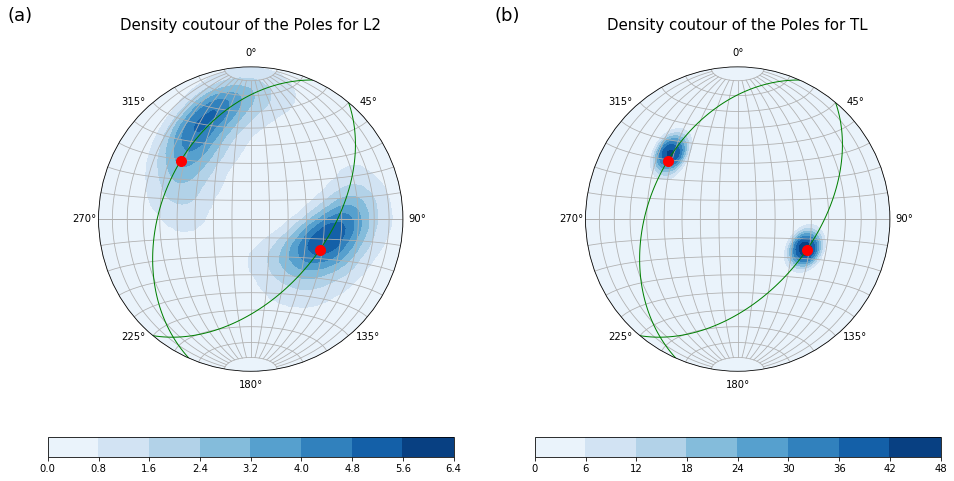

In [8]:
figs_8_9 = plt.figure(figsize=(16,8))

ax = figs_8_9.add_subplot(121, projection='stereonet')
ax.annotate('(a)', xy=(-0.3, 1.15), xycoords="axes fraction", fontsize=18)
ax.plane(strike_correct_syn, dip_correct_syn, 'g-', linewidth=1)
ax.pole(strike_correct_syn, dip_correct_syn, ms=10, c='r', label='Pole of the Planes')
cax=ax.density_contourf(strike_L2_syn, dip_L2_syn, measurement='poles', cmap='Blues',method="schmidt")
ax.set_title('Density coutour of the Poles for L2', y=1.10, fontsize=15)
ax.grid()
figs_8_9.colorbar(cax, ax=figs_8_9.get_axes()[0:2],orientation='horizontal')

ax2 = figs_8_9.add_subplot(122, projection='stereonet')
ax2.annotate('(b)', xy=(-0.3, 1.15), xycoords="axes fraction", fontsize=18)
ax2.plane(strike_correct_syn, dip_correct_syn, 'g-', linewidth=1)
ax2.pole(strike_correct_syn, dip_correct_syn, ms=10, c='r', label='Pole of the Planes')
cax=ax2.density_contourf(strike_TL_syn, dip_TL_syn, measurement='poles', cmap='Blues',method="schmidt")
ax2.set_title('Density coutour of the Poles for TL', y=1.10, fontsize=15)
ax2.grid()
figs_8_9.colorbar(cax, ax=figs_8_9.get_axes()[3:5], orientation='horizontal')
figs_8_9.savefig('Figs_8_9_syn_L2_vs_TL_Schmidt.eps')
figs_8_9.savefig('Figs_8_9_syn_L2_vs_TL_Schmidt.pdf')

## 3.1 Density contouring by Kamb method with exponential smoothing

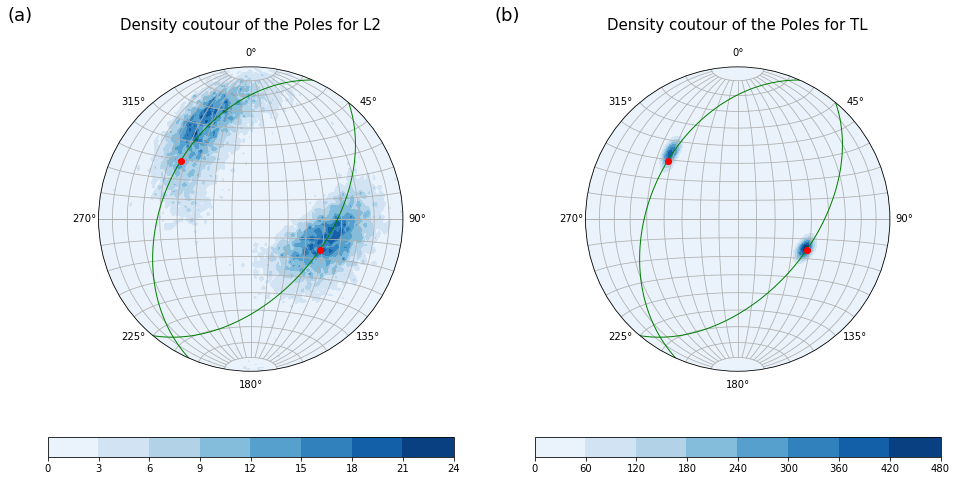

In [231]:
figs_8_9 = plt.figure(figsize=(16,8))

ax = figs_8_9.add_subplot(1,2,1, projection='stereonet')

ax.annotate('(a)', xy=(-0.3, 1.15), xycoords="axes fraction", fontsize=18)
ax.plane(strike_correct_syn, dip_correct_syn, 'g-', linewidth=1)
ax.pole(strike_correct_syn, dip_correct_syn, ms=10, c='r', label='Pole of the Planes')
cax=ax.density_contourf(strike_L2_syn, dip_L2_syn, measurement='poles', cmap='Blues',method="exponential_kamb",sigma=3)
ax.set_title('Density coutour of the Poles for L2', y=1.10, fontsize=15)
ax.grid()
figs_8_9.colorbar(cax, ax=figs_8_9.get_axes()[0:2],orientation='horizontal')

ax = figs_8_9.add_subplot(122, projection='stereonet')
ax.annotate('(b)', xy=(-0.3, 1.15), xycoords="axes fraction", fontsize=18)
ax.plane(strike_correct_syn, dip_correct_syn, 'g-', linewidth=1)
ax.pole(strike_correct_syn, dip_correct_syn, ms=10, c='r', label='Pole of the Planes')
cax=ax.density_contourf(strike_TL_syn, dip_TL_syn, measurement='poles', cmap='Blues',method="exponential_kamb",sigma=3)
ax.set_title('Density coutour of the Poles for TL', y=1.10, fontsize=15)
ax.grid()
figs_8_9.colorbar(cax, ax=figs_8_9.get_axes()[3:5], orientation='horizontal')
figs_8_9.savefig('Figs_8_9_syn_L2_vs_TL_exp_kamb.eps')
figs_8_9.savefig('Figs_8_9_syn_L2_vs_TL_exp_kamb.pdf')

# 4 Combined Figure 14, 15, 16, and 17

## 4.1 Density contouring by Schmidt method (1% count)

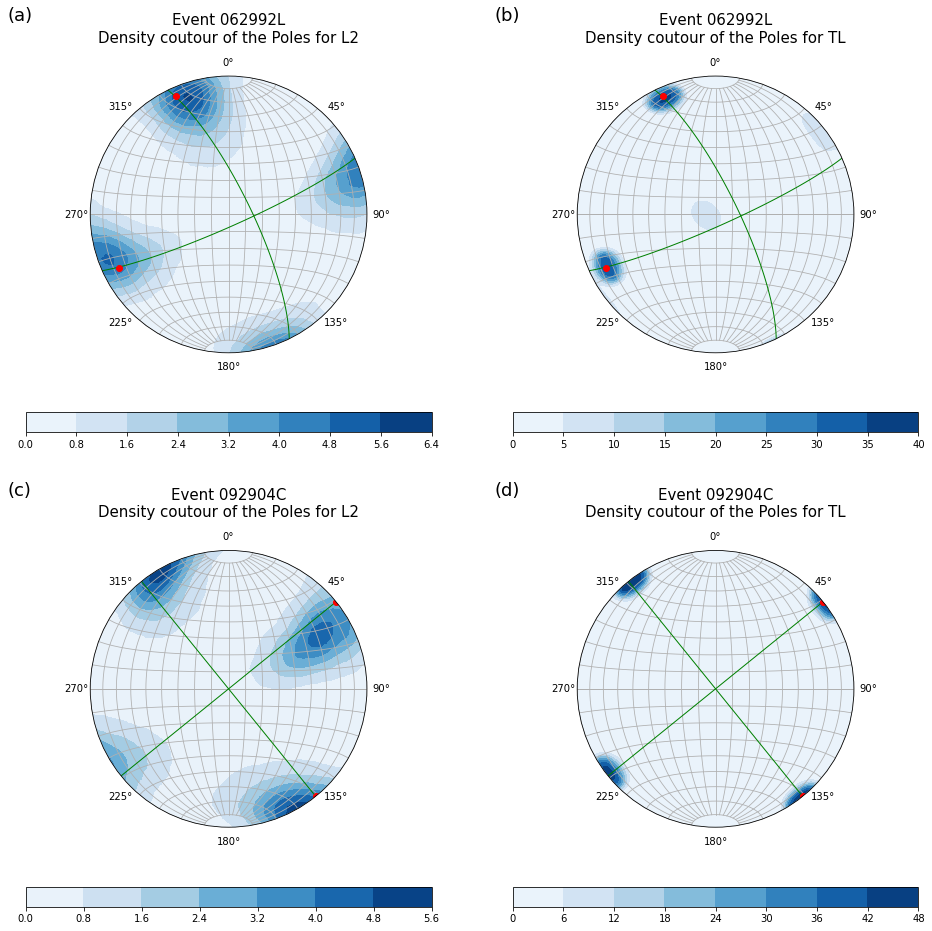

In [219]:
fig_14_15_16_17 = plt.figure(figsize=(16,16))

ax = fig_14_15_16_17.add_subplot(221, projection='stereonet')

ax.annotate('(a)', xy=(-0.3, 1.2), xycoords="axes fraction", fontsize=18)
ax.plane(strike_correct_EV4, dip_correct_EV4, 'g-', linewidth=1)
ax.pole(strike_correct_EV4, dip_correct_EV4, c='r', label='Pole of the Planes')
cax=ax.density_contourf(strike_L2_EV4, dip_L2_EV4, measurement='poles', cmap='Blues',method="schmidt")
ax.set_title('Event 062992L\nDensity coutour of the Poles for L2', y=1.10, fontsize=15)
ax.grid(True)
fig_14_15_16_17.colorbar(cax, ax=fig_14_15_16_17.get_axes()[0:2],orientation='horizontal')

ax = fig_14_15_16_17.add_subplot(222, projection='stereonet')

ax.annotate('(b)', xy=(-0.3, 1.2), xycoords="axes fraction", fontsize=18)
ax.plane(strike_correct_EV4, dip_correct_EV4, 'g-', linewidth=1)
ax.pole(strike_correct_EV4, dip_correct_EV4, c='r', label='Pole of the Planes')
cax=ax.density_contourf(strike_TL_EV4, dip_TL_EV4, measurement='poles', cmap='Blues',method="schmidt")
ax.set_title('Event 062992L\nDensity coutour of the Poles for TL', y=1.10, fontsize=15)
ax.grid()
fig_14_15_16_17.colorbar(cax, ax=fig_14_15_16_17.get_axes()[3:5],orientation='horizontal')

ax = fig_14_15_16_17.add_subplot(223, projection='stereonet')

ax.annotate('(c)', xy=(-0.3, 1.2), xycoords="axes fraction", fontsize=18)
ax.plane(strike_correct_EV5, dip_correct_EV5, 'g-', linewidth=1)
ax.pole(strike_correct_EV5, dip_correct_EV5, c='r', label='Pole of the Planes')
#ax.pole(strike_L2_EV5, dip_L2_EV5, c='k', label='Pole of the Planes')
cax=ax.density_contourf(strike_L2_EV5, dip_L2_EV5, measurement='poles', cmap='Blues',method="schmidt")
ax.set_title('Event 092904C\nDensity coutour of the Poles for L2', y=1.10, fontsize=15)
ax.grid()
fig_14_15_16_17.colorbar(cax, ax=fig_14_15_16_17.get_axes()[6:8],orientation='horizontal')

ax = fig_14_15_16_17.add_subplot(224, projection='stereonet')

ax.annotate('(d)', xy=(-0.3, 1.2), xycoords="axes fraction", fontsize=18)
ax.plane(strike_correct_EV5, dip_correct_EV5, 'g-', linewidth=1)
ax.pole(strike_correct_EV5, dip_correct_EV5, c='r', label='Pole of the Planes')
#ax.pole(strike_TL_EV5, dip_TL_EV5, c='k', label='Pole of the Planes')
cax=ax.density_contourf(strike_TL_EV5, dip_TL_EV5, measurement='poles', cmap='Blues',method="schmidt")
ax.set_title('Event 092904C\nDensity coutour of the Poles for TL', y=1.10, fontsize=15)
ax.grid()
fig_14_15_16_17.colorbar(cax, ax=fig_14_15_16_17.get_axes()[9:11],orientation='horizontal')

fig_14_15_16_17.savefig('Figs_14_15_16_17_L2_vs_TL_schmidt.eps')
fig_14_15_16_17.savefig('Figs_14_15_16_17_L2_vs_TL_schmidt.pdf')

# 5 All eight events

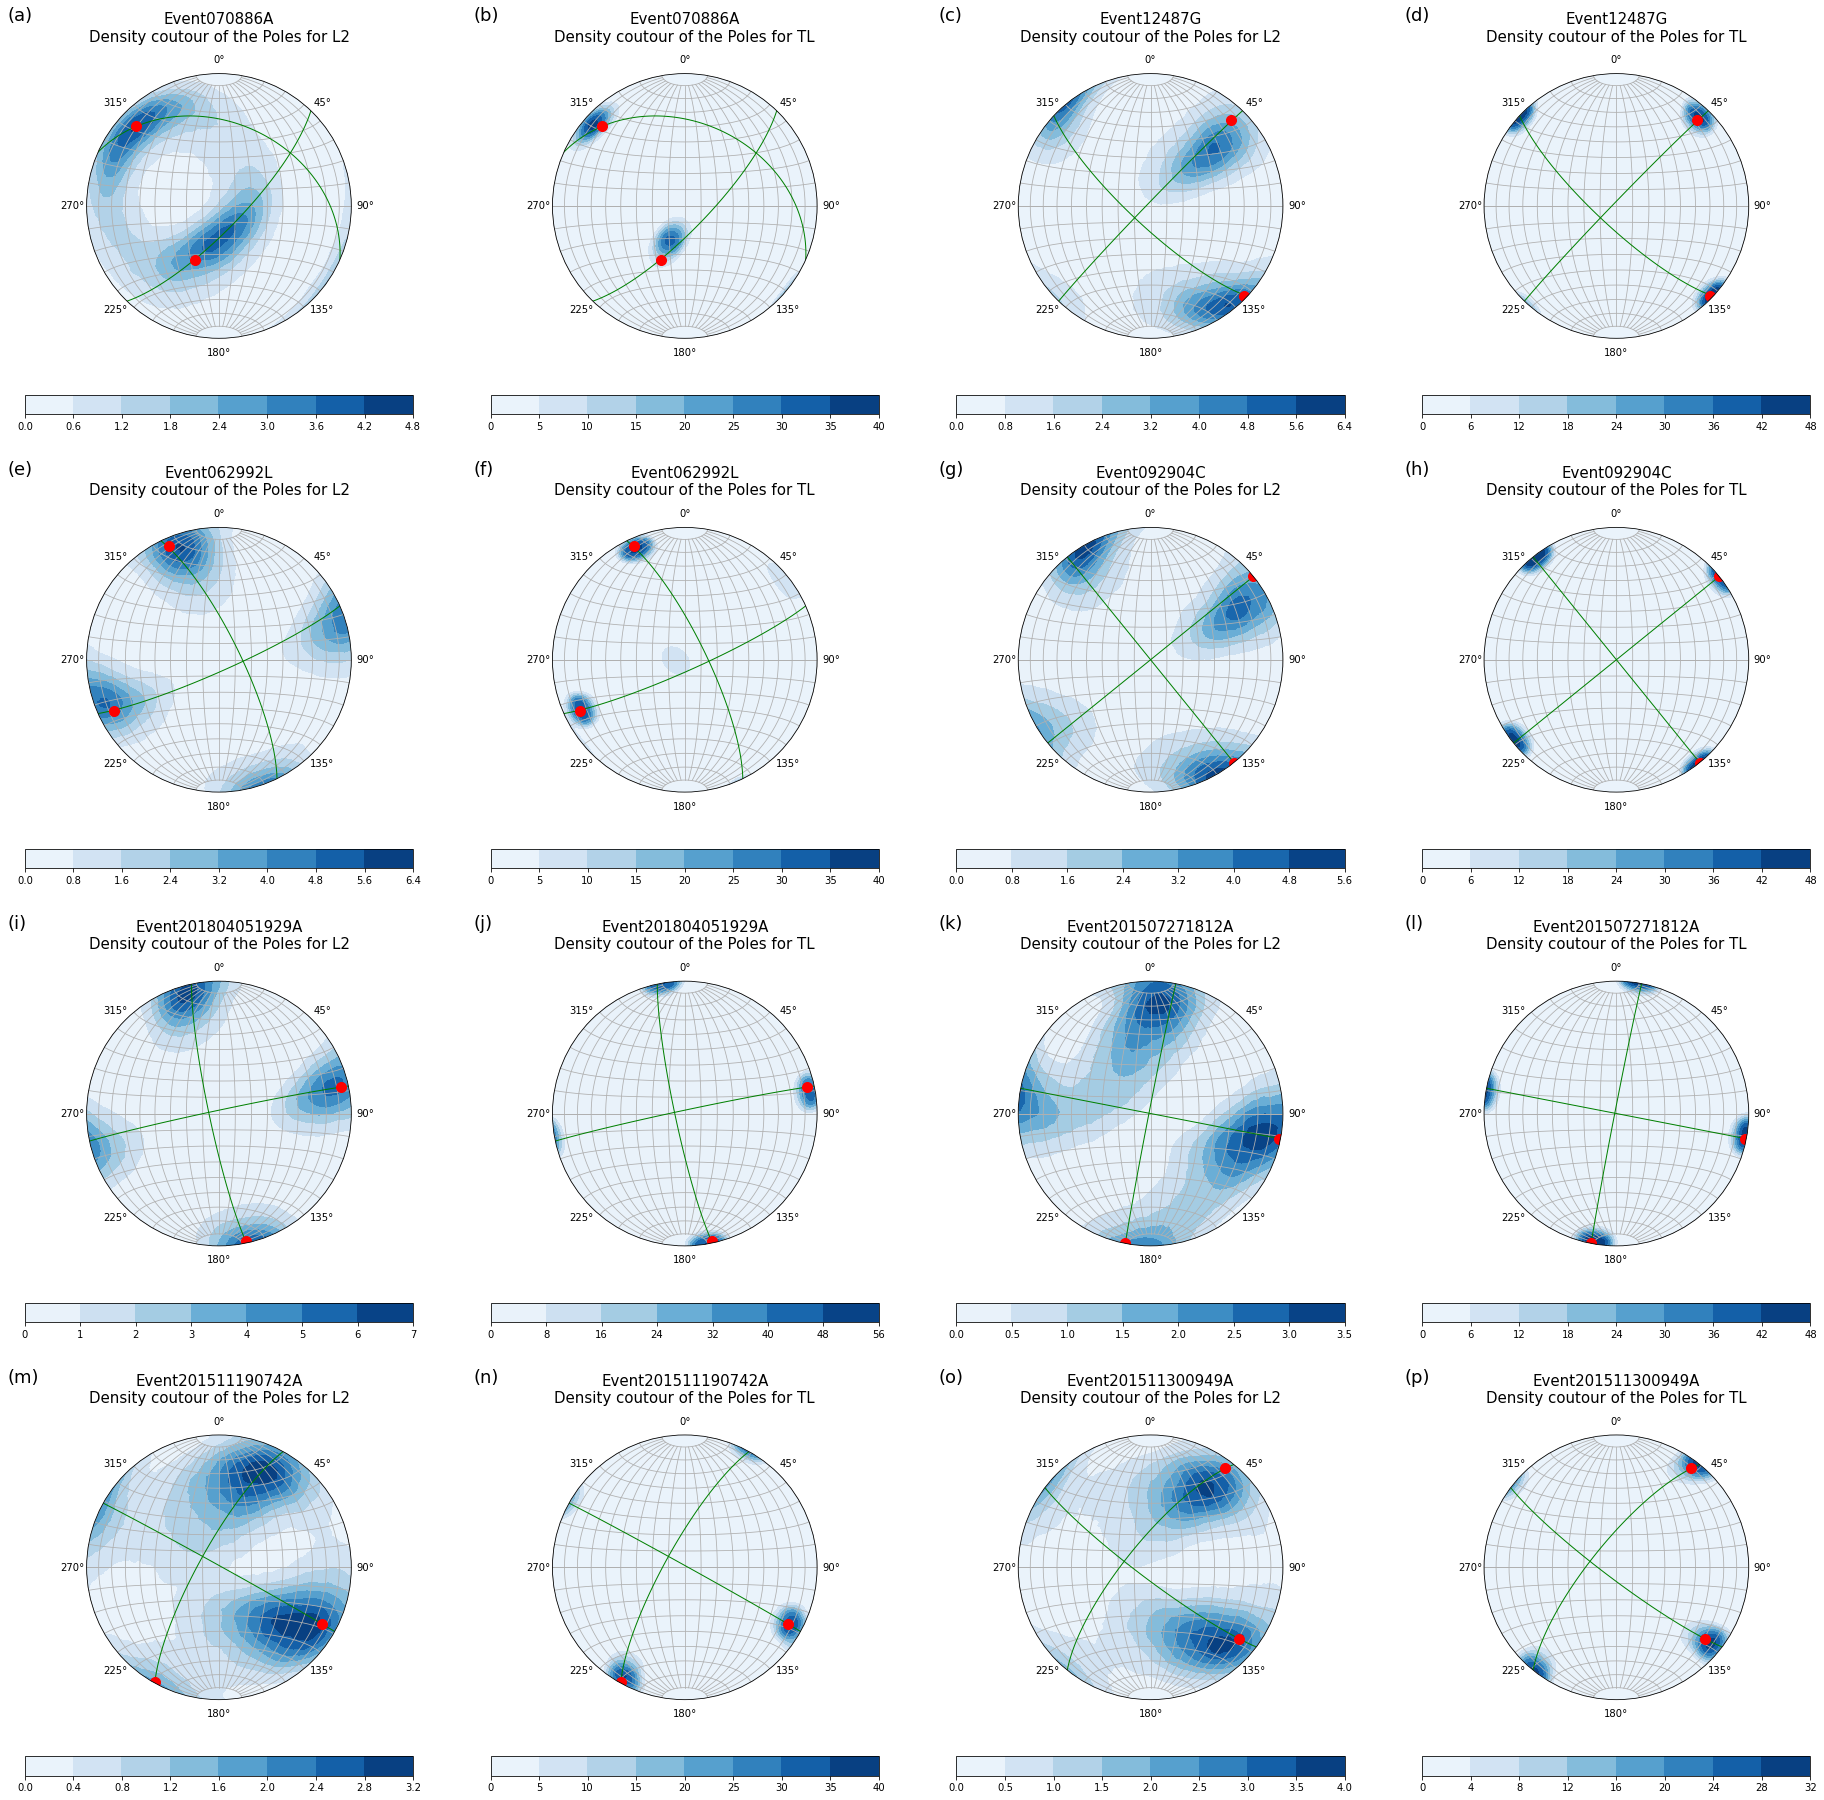

In [10]:
Event_name=["070886A",
            "12487G",
            "062992L",
            "092904C",
            "201804051929A",
            "201507271812A",
            "201511190742A",
            "201511300949A"]
fig_eight_event=plt.figure(figsize=(32,32))
for i in range(8):
    f = open('./for_Chen_'+Event_name[i]+'/correct.txt', 'r')
    correct = np.loadtxt(f, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
    strike_correct, dip_correct = 90 + correct['trend'], 90 - correct['plunge']

    fL2 = open('./for_Chen_'+Event_name[i]+'/randomized.poles.L2.txt', 'r')
    L2 = np.loadtxt(fL2, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
    strike_L2, dip_L2 = 90 + L2['trend'], 90 - L2['plunge']

    fTL = open('./for_Chen_'+Event_name[i]+'/randomized.poles.TL.txt', 'r')
    TL = np.loadtxt(fTL, skiprows=1, dtype={'names': ('trend', 'plunge'),'formats': ('f4', 'f4')})
    strike_TL, dip_TL = 90 + TL['trend'], 90 - TL['plunge']
    
    ax = fig_eight_event.add_subplot(4,4,2*i+1, projection='stereonet')
    ax.annotate('('+chr(ord('a')+2*i)+')', xy=(-0.3, 1.2), xycoords="axes fraction", fontsize=18)
    ax.plane(strike_correct, dip_correct, 'g-', linewidth=1)
    ax.pole(strike_correct, dip_correct, ms=10, c='r', label='Pole of the Planes')
    cax=ax.density_contourf(strike_L2, dip_L2, measurement='poles', cmap='Blues',method="schmidt")
    ax.set_title('Event'+Event_name[i]+'\nDensity coutour of the Poles for L2', y=1.10, fontsize=15)
    ax.grid(True)
    fig_eight_event.colorbar(cax, ax=fig_eight_event.get_axes()[0+3*i*2:2+3*i*2],orientation='horizontal')

    ax = fig_eight_event.add_subplot(4,4,2*i+2, projection='stereonet')

    ax.annotate('('+chr(ord('a')+2*i+1)+')', xy=(-0.3, 1.2), xycoords="axes fraction", fontsize=18)
    ax.plane(strike_correct, dip_correct, 'g-', linewidth=1)
    ax.pole(strike_correct, dip_correct, ms=10, c='r', label='Pole of the Planes')
    cax=ax.density_contourf(strike_TL, dip_TL, measurement='poles', cmap='Blues',method="schmidt")
    ax.set_title('Event'+Event_name[i]+'\nDensity coutour of the Poles for TL', y=1.10, fontsize=15)
    ax.grid()
    fig_eight_event.colorbar(cax, ax=fig_eight_event.get_axes()[3+3*i*2:5+3*i*2],orientation='horizontal')


In [11]:
fig_eight_event.savefig('Fig_eight_events_L2_vs_TL_schmidt_4_4.eps')
fig_eight_event.savefig('Fig_eight_events_L2_vs_TL_schmidt_4_4.pdf')